In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras import utils
from tensorflow.keras.preprocessing.image import load_img, img_to_array, array_to_img
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

In [2]:
# Here we need to set up our x and y
# y_train = utils.to_categorical(y_train)
# y_test = utils.to_categorical(y_test)

X = np.load('./main_tile_array_array_upto_batch24.npy')
y = pd.read_csv('./diagnosis_df_saved_upto_batch24.csv')

In [3]:
# X

In [4]:
len(X)

3600

In [5]:
len(y)

3600

In [6]:
y.drop(columns='diagnosis', inplace=True)


In [7]:
y['Diagnosis'].value_counts(normalize=True)

Oligodendroglioma, NOS           0.416667
Oligodendroglioma, anaplastic    0.277778
Mixed glioma                     0.277778
Astrocytoma, anaplastic          0.027778
Name: Diagnosis, dtype: float64

In [8]:
# y = (y['Diagnosis'] == 'Mixed glioma').astype(int)
y['Diagnosis'] = y['Diagnosis'].map({
    'Mixed glioma' : 0,
    'Oligodendroglioma, NOS' : 1,
    'Oligodendroglioma, anaplastic' : 2,
    'Astrocytoma, anaplastic' : 3
})

# {'Oligodendroglioma, anaplastic' : 0,
#            'Astrocytoma, anaplastic' : 1,
#            'Mixed glioma' : 2,
#            'Oligodendroglioma, NOS' : 3,
#            'Astrocytoma, NOS' : 4
#           }
# y = y.to_numpy()

In [9]:
y = [i for i in y['Diagnosis']]

In [10]:
y = np.array(y)

In [11]:
y

array([2, 2, 2, ..., 1, 1, 1])

In [12]:
y = utils.to_categorical(y, 4)

In [13]:
X_model, X_holdout, y_model, y_holdout = train_test_split(X, y, stratify = y)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_model, y_model, stratify = y_model)

In [15]:
# Make sure each value is a float. (Otherwise, we get an error.)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_holdout = X_holdout.astype('float32')

# The current range of X_train and X_test is 0 to 255.
# The code below is equivalent to X_train = X_train / 255.
# This scales each value to be between 0 and 1.
X_train /= 255
X_test /= 255
X_holdout /= 255

In [16]:
# y_test

In [17]:
X_train[1].shape

(256, 256, 3)

In [18]:
cnn_model = Sequential()

cnn_model.add(Conv2D(
        filters = 6, # number of filters
        kernel_size = (3,3), # height/width of filter
        activation = 'relu',
        input_shape = (256, 256, 3)))


cnn_model.add(MaxPooling2D(pool_size=(2,2)))

# cnn_model.add(Dropout(0.5))

cnn_model.add(Conv2D(32,
                     kernel_size=(3,3),
                     activation= 'relu'
                    ))

cnn_model.add(MaxPooling2D(pool_size=(2,2)))

cnn_model.add(Dropout(0.05))

# cnn_model.add(Conv2D(32,
#                      kernel_size=(3,3),
#                      activation= 'relu'
#                     ))

# cnn_model.add(MaxPooling2D(pool_size=(2,2)))

# cnn_model.add(Dropout(0.05))

cnn_model.add(Flatten())

cnn_model.add(Dense(128, activation='relu'))

cnn_model.add(Dense(4, activation='softmax'))

cnn_model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
cnn_model.summary()
history = cnn_model.fit(X_train,
                        y_train,
                        batch_size=256,
                        validation_data=(X_test, y_test),
                        epochs=10,
                        verbose=1)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 6)       168       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 6)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 32)      1760      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 62, 62, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 123008)            0         
_________________________________________________________________
dense (Dense)                (None, 128)               1

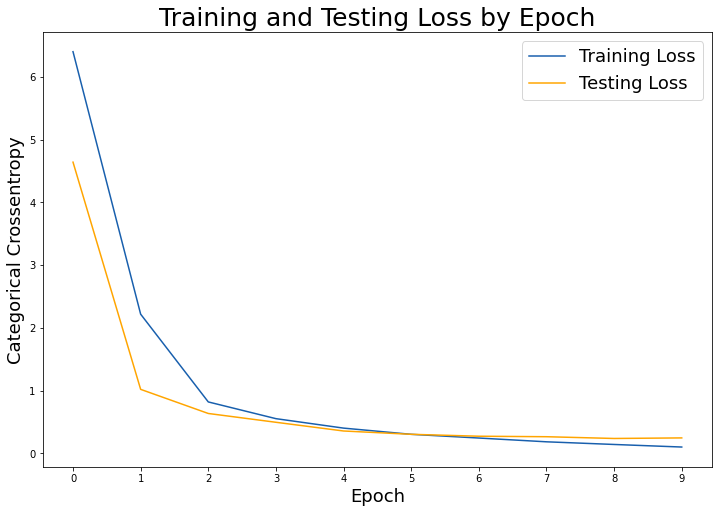

In [19]:
# Check out our train loss and test loss over epochs.
train_loss = history.history['loss']
test_loss = history.history['val_loss']

# Set figure size.
plt.figure(figsize=(12, 8))

# Generate line plot of training, testing loss over epochs.
plt.plot(train_loss, label='Training Loss', color='#185fad')
plt.plot(test_loss, label='Testing Loss', color='orange')

# Set title
plt.title('Training and Testing Loss by Epoch', fontsize = 25)
plt.xlabel('Epoch', fontsize = 18)
plt.ylabel('Categorical Crossentropy', fontsize = 18)
plt.xticks(np.arange(10), np.arange(10))

plt.legend(fontsize = 18);

plt.savefig('./loss_graph_white.png',transparent = False)

In [20]:
ypreds = cnn_model.predict_classes(X_holdout)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [21]:
ypreds

array([1, 1, 0, 2, 1, 0, 0, 2, 1, 1, 0, 1, 0, 0, 2, 2, 1, 1, 2, 0, 1, 1,
       1, 2, 1, 0, 2, 1, 2, 2, 1, 2, 1, 1, 0, 0, 1, 2, 2, 0, 1, 0, 1, 0,
       2, 0, 1, 0, 0, 0, 1, 1, 2, 0, 0, 2, 0, 2, 1, 0, 2, 2, 2, 1, 2, 1,
       0, 0, 0, 2, 1, 2, 2, 0, 2, 2, 1, 1, 2, 0, 2, 0, 2, 2, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 2, 1, 1, 1, 2, 0, 2, 0, 0, 2, 2, 0, 1, 2, 0,
       0, 0, 1, 2, 2, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       1, 1, 0, 2, 0, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       2, 0, 2, 0, 0, 0, 1, 2, 1, 0, 0, 1, 0, 1, 0, 0, 2, 1, 1, 2, 1, 1,
       2, 1, 2, 2, 1, 1, 0, 2, 0, 1, 1, 1, 2, 2, 0, 0, 0, 2, 0, 1, 1, 0,
       1, 0, 0, 2, 2, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 2, 1, 0, 1, 2, 1,
       0, 0, 2, 2, 0, 1, 1, 0, 2, 0, 0, 2, 1, 2, 2, 1, 0, 1, 0, 0, 1, 2,
       1, 1, 2, 1, 0, 0, 1, 1, 0, 0, 1, 1, 2, 0, 1, 0, 1, 2, 0, 2, 2, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 2, 1, 1, 1, 1, 2, 2, 2, 1, 2, 1, 0, 1,
       2, 3, 0, 1, 1, 0, 2, 0, 1, 0, 0, 1, 0, 0, 2,

In [22]:
y_holdout_true = np.argmax(y_holdout, axis=1, out=None)

In [23]:
y_holdout_true

array([1, 1, 0, 2, 1, 0, 0, 2, 1, 1, 0, 1, 0, 0, 2, 2, 1, 1, 2, 0, 1, 1,
       1, 2, 1, 0, 2, 1, 0, 2, 1, 2, 1, 1, 2, 0, 1, 2, 2, 0, 1, 0, 1, 2,
       2, 1, 1, 0, 0, 0, 1, 1, 2, 0, 0, 2, 1, 2, 1, 0, 2, 2, 2, 1, 2, 1,
       0, 0, 0, 2, 1, 2, 2, 0, 2, 0, 1, 1, 2, 0, 2, 1, 2, 2, 1, 1, 0, 1,
       1, 0, 1, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 0, 0, 2, 2, 0, 1, 2, 0,
       0, 0, 1, 2, 2, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 3, 2,
       1, 1, 0, 2, 0, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       2, 0, 2, 0, 0, 0, 1, 2, 1, 0, 0, 1, 0, 1, 0, 0, 2, 0, 1, 2, 1, 1,
       2, 1, 2, 2, 1, 1, 0, 2, 0, 1, 1, 1, 2, 2, 0, 2, 0, 2, 0, 1, 1, 0,
       0, 0, 0, 2, 2, 0, 0, 1, 1, 0, 1, 1, 1, 0, 3, 0, 2, 1, 0, 1, 2, 1,
       0, 0, 2, 2, 0, 1, 1, 0, 2, 3, 0, 2, 1, 2, 2, 1, 0, 1, 0, 0, 1, 2,
       1, 1, 2, 1, 0, 0, 1, 1, 0, 0, 1, 1, 2, 0, 1, 2, 1, 2, 2, 2, 2, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 2, 1, 1, 1, 1, 2, 2, 2, 1, 2, 1, 0, 1,
       2, 3, 0, 1, 1, 0, 2, 3, 1, 3, 0, 1, 0, 0, 2,

In [24]:
len(ypreds)

900

In [25]:
len(y_holdout_true)

900

In [26]:
ypreds.shape

(900,)

In [27]:
y_holdout_true.shape

(900,)

In [28]:
type(y_holdout_true)

numpy.ndarray

In [29]:
type(ypreds)

numpy.ndarray

In [68]:
roc_auc_score(y_holdout_test, 
              ypreds_test, 
              average='weighted', 
              multi_class='ovo')

NameError: name 'y_holdout_test' is not defined

In [30]:
from sklearn.metrics import confusion_matrix
save_confusion_matrix = confusion_matrix(y_holdout_true, ypreds)
np.save('./confustion_matrix.npy', save_confusion_matrix)
save_confusion_matrix

array([[237,   8,   5,   0],
       [ 13, 362,   0,   0],
       [ 24,   1, 225,   0],
       [ 18,   0,   4,   3]])